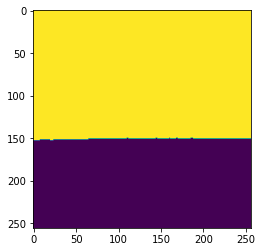

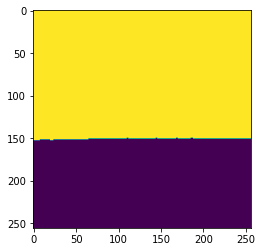

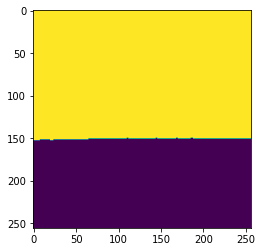

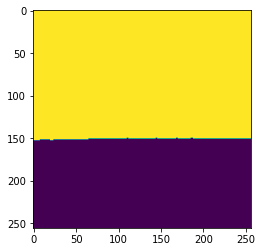

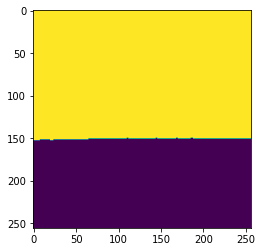

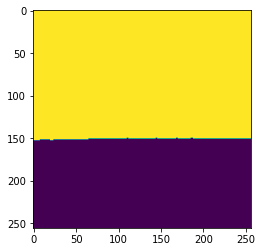

26.25


In [1]:
from __future__ import division
import itertools
import sys
import time
import random
import cv2
import numpy as np
from numpy import newaxis as nax
import scipy.misc as misc
from scipy.stats import multivariate_normal
from numpy import asarray, concatenate, cov, zeros
import matplotlib.pyplot as plt
from PIL import Image
    
def get_neighbors(grid, x, y):
    out = []
    if x > 0:
        out.append(grid[x-1, y,0])
    if y > 0:
        out.append(grid[x, y-1,0])
    if y < grid.shape[1] - 1:
        out.append(grid[x, y+1,0])
    if x < grid.shape[0] - 1:
        out.append(grid[x+1, y,0])
    return out

def probability(image, shape, norm_raspr1, norm_raspr2):
    marked_image_data = zeros(shape=shape, dtype=float)
    for i in range(shape[0]):
        for j in range(shape[1]):
            pdf1 = norm_raspr1.pdf(image[i][j])
            pdf2 = norm_raspr2.pdf(image[i][j])
            if pdf1 > pdf2:
                marked_image_data[i][j] = 1, pdf1, pdf2
            else:
                marked_image_data[i][j] = 0, pdf1, pdf2
    return marked_image_data
    
def sampler(massive, shape):
    eps = 0.2
    for i in range(shape[0]):
        for j in range(shape[1]):
            neighbors = get_neighbors(massive,i,j)
            k1 = massive[i, j][1]
            k2 = massive[i, j][2]
            for k in neighbors:
                if(k == 1):
                    k1 = k1*(1-eps)
                else:
                    k1 = k1*eps
                if(k == 0):
                    k2 = k2*(1-eps)
                else:
                    k2 = k2*eps
            prob_k1, prob_k2 = k1 / (k1 + k2), k2 / (k1 + k2)
            if(prob_k1 > prob_k2):
                massive[i, j, 0] = 1
            else:
                massive[i, j, 0] = 0
            massive[i, j, 1:] = prob_k1, prob_k2
    return massive

t = time.process_time()
image_path = 'D:/Labs KPI/Labs Pattern/lab1/stock-photo-golden-wheat-field-blue-clear.jpg'
image = Image.open(image_path)
image = cv2.imread(image_path)
image = cv2.resize(image,(256,256))
shape = image.shape
image_1 = image[:40, :40]
image_2 = image[230:, 230:]
image_1_conc = concatenate((image_1), axis = 0)
image_1_conc_cov = cov(image_1_conc, rowvar=False)
norm_raspr1 = multivariate_normal(mean = image_1_conc.mean(axis = 0), cov = image_1_conc_cov)
image_2_conc = concatenate((image_2), axis = 0)
image_2_conc_cov = cov(image_2_conc, rowvar=False)
norm_raspr2 = multivariate_normal(mean = image_2_conc.mean(axis = 0), cov = image_2_conc_cov)
marked_image_data = probability(image, shape, norm_raspr1, norm_raspr2)
for i in range(101):
        marked_image_data = sampler(marked_image_data, shape)
        if i % 20 == 0:
            plt.imshow(marked_image_data[:, :, 0])
            plt.show()
print(time.process_time() - t)